## TPC-DS BigQuery Import  
Import data from GCS to a previously created BigQuery dataset

In [1]:
import config, schema, bq, load

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.set_option("display.max_rows", 1000)

In [4]:
from importlib import reload

### I. TPC-H 1GB - basic, no config

In [5]:
dataset_name = 'ds_1GB_1_basic'

In [6]:
schema.rewrite_ds_basic(filepath_out=config.ds_schema_bq_basic_filepath,
                        dataset_name=dataset_name)

In [7]:
bq.create_dataset(dataset_name=dataset_name)

Dataset(DatasetReference('tpc-benchmarking-9432', 'ds_1GB_1_basic'))

In [8]:
bq.create_schema(schema_file=config.ds_schema_bq_basic_filepath)

In [9]:
# set n to about 5, high numbers run afoul of BQ's upload limits
# i.e. 403 - rateLimitExceeded
# https://cloud.google.com/bigquery/docs/error-messages
u = load.BQPooledUpload(dataset_name=dataset_name,
                        test="ds", scale=1, n=5)
u.verbose = True

In [10]:
u.df.dtypes

chunk_name    object
url           object
size_bytes     int64
uri           object
test          object
scale         object
table         object
n             object
t0            object
t1            object
done          object
file_n         int64
dtype: object

In [11]:
results = u.pipeline()

Starting job 962984d4-4bc5-48ac-ac90-e71234b32d55
Starting job d219905a-6212-41eb-94b7-0c1b8845e136
Starting job 8011c9b9-a44d-4bf2-b1e6-bf5eaa4ace0f
Starting job 8a9390e9-38bb-453e-a76a-16501b3623f6
Starting job 82a8c337-6b80-4a3d-b181-8a1abf3bb2db
Job finished.
Loading: ds_1GB_call_center_1_12.dat
t0: 2020-04-08 11:46:37.626483
t1: 2020-04-08 11:46:40.333678
Done: True
------------------------------
Job finished.
Loading: ds_1GB_household_demographics_1_12.dat
t0: 2020-04-08 11:46:37.628665
t1: 2020-04-08 11:46:41.149813
Done: True
------------------------------
Job finished.
Loading: ds_1GB_store_1_12.dat
t0: 2020-04-08 11:46:37.634814
t1: 2020-04-08 11:46:41.843684
Done: True
------------------------------
Starting job 06892f3a-a66e-4a01-8a96-ae787d5f4db5
Starting job 601e54f2-9efa-425f-986b-edb4d10f569f
Starting job 960cf87d-8268-4c2b-a695-d6f4d6524e1d
Job finished.
Loading: ds_1GB_household_demographics_1_12.dat
t0: 2020-04-08 11:46:41.150290
t1: 2020-04-08 11:46:43.787828
Done: 

In [12]:
a = list(results)
a

[None, None, None, None, None]

In [13]:
dfx = pd.concat(u.up_data)
dfx.sort_index(inplace=True)

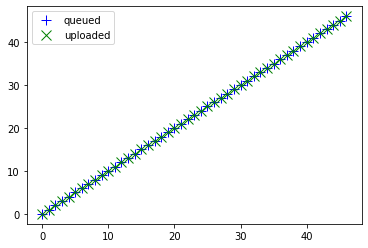

In [36]:
plt.plot(u.df.index, '+',
         markersize=10, 
         markerfacecolor=None,
         markeredgecolor='blue', label="queued");
plt.plot(dfx.index, 'x',
         markersize=10, 
         markerfacecolor=None,
         markeredgecolor='green', label="uploaded");
plt.legend();

In [15]:
dfx

,chunk_name,url,size_bytes,uri,test,scale,table,n,t0,t1,done,file_n,dt,dt_s,size_megabytes,size_gigabytes,MB/s,GB/s
0,ds_1GB_call_center_1_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,1885,gs://tpc-benchmark-5947/ds_1GB_call_center_1_1...,ds,1GB,call_center,1,2020-04-08 11:46:40.334158,2020-04-08 11:46:50.292784,True,0,00:00:09.958626,9.958626,0.001798,1.885000e-06,0.000181,1.892831e-07
1,ds_1GB_catalog_page_1_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,1620074,gs://tpc-benchmark-5947/ds_1GB_catalog_page_1_...,ds,1GB,catalog_page,1,2020-04-08 11:46:50.293914,2020-04-08 11:47:08.138661,True,1,00:00:17.844747,17.844747,1.545023,1.620074e-03,0.086581,9.078717e-05
2,ds_1GB_catalog_returns_1_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,21234304,gs://tpc-benchmark-5947/ds_1GB_catalog_returns...,ds,1GB,catalog_returns,1,2020-04-08 11:47:08.139370,2020-04-08 11:47:27.357129,True,2,00:00:19.217759,19.217759,20.250610,2.123430e-02,1.053745,1.104931e-03
3,ds_1GB_catalog_sales_1_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,294468836,gs://tpc-benchmark-5947/ds_1GB_catalog_sales_1...,ds,1GB,catalog_sales,1,2020-04-08 11:47:27.357974,2020-04-08 11:48:57.580477,True,3,00:01:30.222503,90.222503,280.827366,2.944688e-01,3.112609,3.263807e-03
4,ds_1GB_customer_1_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,13109372,gs://tpc-benchmark-5947/ds_1GB_customer_1_12.dat,ds,1GB,customer,1,2020-04-08 11:48:57.581594,2020-04-08 11:49:16.674385,True,4,00:00:19.092791,19.092791,12.502071,1.310937e-02,0.654806,6.866137e-04
5,ds_1GB_customer_address_1_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,5452165,gs://tpc-benchmark-5947/ds_1GB_customer_addres...,ds,1GB,customer_address,1,2020-04-08 11:49:16.675159,2020-04-08 11:49:23.635231,True,5,00:00:06.960072,6.960072,5.199590,5.452165e-03,0.747060,7.833489e-04
6,ds_1GB_customer_demographics_10_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,6658276,gs://tpc-benchmark-5947/ds_1GB_customer_demogr...,ds,1GB,customer_demographics,10,2020-04-08 11:49:23.635934,2020-04-08 11:49:31.105030,True,6,00:00:07.469096,7.469096,6.349827,6.658276e-03,0.850147,8.914434e-04
7,ds_1GB_customer_demographics_11_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,6650896,gs://tpc-benchmark-5947/ds_1GB_customer_demogr...,ds,1GB,customer_demographics,11,2020-04-08 11:49:31.105770,2020-04-08 11:49:37.397061,True,7,00:00:06.291291,6.291291,6.342789,6.650896e-03,1.008186,1.057159e-03
8,ds_1GB_customer_demographics_12_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,6657550,gs://tpc-benchmark-5947/ds_1GB_customer_demogr...,ds,1GB,customer_demographics,12,2020-04-08 11:49:37.398521,2020-04-08 11:49:50.622241,True,8,00:00:13.223720,13.223720,6.349134,6.657550e-03,0.480132,5.034552e-04
9,ds_1GB_customer_demographics_1_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,6381073,gs://tpc-benchmark-5947/ds_1GB_customer_demogr...,ds,1GB,customer_demographics,1,2020-04-08 11:49:50.622858,2020-04-08 11:49:56.592557,True,9,00:00:05.969699,5.969699,6.085465,6.381073e-03,1.019392,1.068910e-03


### II. TPC-H 2GB - basic, no config

In [21]:
dataset_name = 'ds_2GB_1_basic'

In [22]:
ddl_filepath = config.fp_ds_output + config.sep + dataset_name + ".sql"

In [23]:
schema.rewrite_ds_basic(filepath_out=ddl_filepath,
                        dataset_name=dataset_name)

In [25]:
bq.create_dataset(dataset_name=dataset_name)

Dataset(DatasetReference('tpc-benchmarking-9432', 'ds_2GB_1_basic'))

In [26]:
bq.create_schema(schema_file=ddl_filepath)

In [20]:
# set n to about 5, high numbers run afoul of BQ's upload limits
# i.e. 403 - rateLimitExceeded
# https://cloud.google.com/bigquery/docs/error-messages
u = load.BQPooledUpload(dataset_name=dataset_name,
                        test="ds", scale=2, n=5)
u.verbose = True

In [27]:
u.df.dtypes

chunk_name    object
url           object
size_bytes     int64
uri           object
test          object
scale         object
table         object
n             object
t0            object
t1            object
done          object
file_n         int64
dtype: object

In [28]:
results = u.pipeline()

Starting job b6fe2f5a-0d7e-4e3c-9fad-7799fc39023e
Starting job f5a0e7d6-bad8-42a0-a575-474783aeef01Starting job 5fda02a8-c90f-4e20-988a-7183fe16d04d

Starting job 95de88e5-f9a7-4604-9978-6f2cabcdffa1
Starting job 8d5f34b1-ce46-4f0b-a70c-56bd7c7fa9bd
Job finished.
Loading: ds_2GB_household_demographics_1_12.dat
t0: 2020-04-08 13:36:00.096207
t1: 2020-04-08 13:36:02.799405
Done: True
------------------------------
Starting job 94c7b6ac-6e5e-4419-aea0-36d496253426
Job finished.
Loading: ds_2GB_call_center_1_12.dat
t0: 2020-04-08 13:36:00.091237
t1: 2020-04-08 13:36:05.224837
Done: True
------------------------------
Job finished.
Loading: ds_2GB_store_1_12.dat
t0: 2020-04-08 13:36:00.102326
t1: 2020-04-08 13:36:05.389029
Done: True
------------------------------
Job finished.
Loading: ds_2GB_household_demographics_1_12.dat
t0: 2020-04-08 13:36:02.800567
t1: 2020-04-08 13:36:05.870210
Done: True
------------------------------
Starting job 6b654c5a-7206-4cbb-971a-1fcc805cc18a
Starting job 2

In [29]:
a = list(results)
a

[None, None, None, None, None]

In [30]:
dfx = pd.concat(u.up_data)
dfx.sort_index(inplace=True)

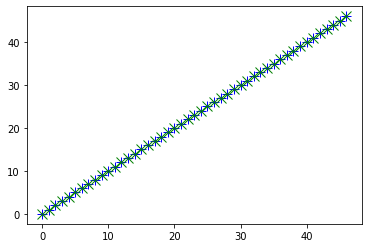

In [31]:
plt.plot(u.df.index, '+',
         markersize=10, 
         markerfacecolor=None,
         markeredgecolor='blue', label="queued");
plt.plot(dfx.index, 'x',
         markersize=10, 
         markerfacecolor=None,
         markeredgecolor='green', label="uploaded");
plt.legend();

In [33]:
dfx[["chunk_name", "size_bytes", "table", "done", "MB/s"]]

,chunk_name,size_bytes,table,done,MB/s
0,ds_2GB_call_center_1_12.dat,2459,call_center,True,0.000765
1,ds_2GB_catalog_page_1_12.dat,1620074,catalog_page,True,0.476722
2,ds_2GB_catalog_returns_1_12.dat,42910964,catalog_returns,True,1.606037
3,ds_2GB_catalog_sales_1_12.dat,592281282,catalog_sales,True,6.013269
4,ds_2GB_customer_1_12.dat,18938246,customer,True,0.609402
5,ds_2GB_customer_address_1_12.dat,7858592,customer_address,True,1.448125
6,ds_2GB_customer_demographics_10_12.dat,6658276,customer_demographics,True,0.633804
7,ds_2GB_customer_demographics_11_12.dat,6650896,customer_demographics,True,0.625034
8,ds_2GB_customer_demographics_12_12.dat,6657550,customer_demographics,True,0.632296
9,ds_2GB_customer_demographics_1_12.dat,6381073,customer_demographics,True,0.378807
